# Putting It Together

#### CS 5806

In [71]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
SEED = 100

In [2]:
# all state abbrieviations
states = ['AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'FL', 'GA', 
          'HI', 'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD', 
          'MA', 'MI', 'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ', 
          'NM', 'NY', 'NC', 'ND', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 
          'SD', 'TN', 'TX', 'UT', 'VT', 'VA', 'WA', 'WV', 'WI', 'WY']

In [3]:
state_abbr_map = {'AL': 'Alabama', 'AK': 'Alaska', 'AZ': 'Arizona', 'AR': 'Arkansas', 
                  'CA': 'California', 'CO': 'Colorado', 'CT': 'Connecticut', 'DE': 'Delaware',
                  'FL': 'Florida', 'GA': 'Georgia', 'HI': 'Hawaii', 'ID': 'Idaho', 'IL': 'Illinois', 
                  'IN': 'Indiana', 'IA': 'Iowa', 'KS': 'Kansas', 'KY': 'Kentucky', 'LA': 'Louisiana',
                  'ME': 'Maine', 'MD': 'Maryland', 'MA': 'Massachusetts', 'MI': 'Michigan', 
                  'MN': 'Minnesota', 'MS': 'Mississippi', 'MO': 'Missouri', 'MT': 'Montana', 
                  'NE': 'Nebraska', 'NV': 'Nevada', 'NH': 'New Hampshire', 'NJ': 'New Jersey', 
                  'NM': 'New Mexico', 'NY': 'New York', 'NC': 'North Carolina', 'ND': 'North Dakota', 
                  'OH': 'Ohio', 'OK': 'Oklahoma', 'OR': 'Oregon', 'PA': 'Pennsylvania', 'RI': 'Rhode Island', 
                  'SC': 'South Carolina', 'SD': 'South Dakota', 'TN': 'Tennessee', 'TX': 'Texas', 
                  'UT': 'Utah', 'VT': 'Vermont', 'VA': 'Virginia', 'WA': 'Washington', 'WV': 'West Virginia', \
                  'WI': 'Wisconsin', 'WY': 'Wyoming'}

In [4]:
state_abb_subset = ['CA', 'FL', 'GA', 'IL', 'MI', 'NC', 'NY', 'OH', 'PA', 'TX', ]
state_subset = ['California', 'Florida', 'Georgia', 'Illinois', 'Michigan', 
                'North Carolina', 'New York', 'Ohio', 'Pennsylvania', 'Texas']

Using the scraped Google Trends data in the merged_csvs directory, combine every csv for each state into a collective csv containing the trends for each artist for each state

In [5]:
state_trends = pd.DataFrame()

for s in states:

    state_df = pd.read_csv("merged_csvs/" + s + "_trend_data.csv", index_col=0)
    state_df['State'] = [s] * len(state_df)

    state_trends = pd.concat([state_trends, state_df])

state_trends = state_trends.fillna(0).replace(np.inf, 1)
state_trends = state_trends.replace(state_abbr_map)


In [6]:
state_trends

,date,Ed Sheeran,Guns N' Roses,Coldplay,Metallica,The Rolling Stones,Pink,U2,Bruno Mars,State
0,2015-01-04,1.000000,0.154930,0.230769,0.243902,0.225352,0.148148,0.112676,0.485714,Alabama
1,2015-01-11,1.923077,0.150000,0.318182,0.434783,0.400000,0.000000,0.250000,1.400000,Alabama
2,2015-01-18,1.279070,0.287879,0.054054,0.236842,0.060606,0.160000,0.166667,1.151515,Alabama
3,2015-01-25,1.500000,0.070175,0.218750,0.303030,0.192982,0.116279,0.105263,0.857143,Alabama
4,2015-02-01,1.925926,0.179487,0.142857,0.272727,0.333333,0.275862,0.230769,1.736842,Alabama
...,...,...,...,...,...,...,...,...,...,...
256,2019-12-01,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,Wyoming
257,2019-12-08,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,Wyoming
258,2019-12-15,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,Wyoming
259,2019-12-22,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,Wyoming


In [7]:
artists = np.array(state_trends.columns[1:9])
artists

array(['Ed Sheeran', "Guns N' Roses", 'Coldplay', 'Metallica',
       'The Rolling Stones', 'Pink', 'U2', 'Bruno Mars'], dtype=object)

In [8]:
state_trends['date'] = pd.to_datetime(state_trends['date'])

In [9]:
# taking a pandas datetime object as input, change it to be string format that we care about. ex: 2015:Q4
def get_quarter(date):
    return str(date.year) + ":Q" + str(pd.Timestamp(date).quarter)

In [10]:
state_trends['Quarter'] = state_trends['date'].apply(get_quarter)
state_trends = state_trends.drop('date', axis=1)
state_trends

,Ed Sheeran,Guns N' Roses,Coldplay,Metallica,The Rolling Stones,Pink,U2,Bruno Mars,State,Quarter
0,1.000000,0.154930,0.230769,0.243902,0.225352,0.148148,0.112676,0.485714,Alabama,2015:Q1
1,1.923077,0.150000,0.318182,0.434783,0.400000,0.000000,0.250000,1.400000,Alabama,2015:Q1
2,1.279070,0.287879,0.054054,0.236842,0.060606,0.160000,0.166667,1.151515,Alabama,2015:Q1
3,1.500000,0.070175,0.218750,0.303030,0.192982,0.116279,0.105263,0.857143,Alabama,2015:Q1
4,1.925926,0.179487,0.142857,0.272727,0.333333,0.275862,0.230769,1.736842,Alabama,2015:Q1
...,...,...,...,...,...,...,...,...,...,...
256,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,Wyoming,2019:Q4
257,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,Wyoming,2019:Q4
258,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,Wyoming,2019:Q4
259,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,Wyoming,2019:Q4


Stacking the dataframe with state and quarter as the index will allow us to easily group by state and quarter later, aggregating together the trend scores.

In [11]:
stacked_trends = state_trends.set_index(['State', 'Quarter']).stack().reset_index().rename(columns = {'level_2': 'Artist', 0: 'Trend Index'})
stacked_trends

,State,Quarter,Artist,Trend Index
0,Alabama,2015:Q1,Ed Sheeran,1.000000
1,Alabama,2015:Q1,Guns N' Roses,0.154930
2,Alabama,2015:Q1,Coldplay,0.230769
3,Alabama,2015:Q1,Metallica,0.243902
4,Alabama,2015:Q1,The Rolling Stones,0.225352
...,...,...,...,...
104395,Wyoming,2019:Q4,Metallica,0.000000
104396,Wyoming,2019:Q4,The Rolling Stones,0.000000
104397,Wyoming,2019:Q4,Pink,1.000000
104398,Wyoming,2019:Q4,U2,0.000000


Average the trend scores over each state, artist, and quarter

In [12]:
quarterly_trends = stacked_trends.groupby(['State', 'Artist', 'Quarter']).agg(np.average).reset_index()
quarterly_trends

,State,Artist,Quarter,Trend Index
0,Alabama,Bruno Mars,2015:Q1,0.882361
1,Alabama,Bruno Mars,2015:Q2,0.556828
2,Alabama,Bruno Mars,2015:Q3,0.324614
3,Alabama,Bruno Mars,2015:Q4,0.226955
4,Alabama,Bruno Mars,2016:Q1,0.532066
...,...,...,...,...
7995,Wyoming,U2,2018:Q4,0.153846
7996,Wyoming,U2,2019:Q1,0.076923
7997,Wyoming,U2,2019:Q2,0.230769
7998,Wyoming,U2,2019:Q3,0.461538


Get the Google Trend Index - the average Google Trend scores for a given state and quarter

In [13]:
avg_by_quarter = quarterly_trends[['State', 'Quarter', 'Trend Index']].groupby(['State', 'Quarter']).agg(np.average).reset_index()
avg_by_quarter

,State,Quarter,Trend Index
0,Alabama,2015:Q1,0.445034
1,Alabama,2015:Q2,0.495337
2,Alabama,2015:Q3,0.270065
3,Alabama,2015:Q4,0.246262
4,Alabama,2016:Q1,0.374800
...,...,...,...
995,Wyoming,2018:Q4,0.375000
996,Wyoming,2019:Q1,0.451923
997,Wyoming,2019:Q2,0.394231
998,Wyoming,2019:Q3,0.413462


<hr>

In [14]:
concert_gdp_df = pd.read_csv("Data/concert_and_economic_data.csv", index_col=0)

In [15]:
concert_gdp_df

,State,Quarter,GDP Growth,Count,Total Revenue
0,Alabama,2015:Q1,-0.366568,0.0,0.0
1,Alabama,2015:Q2,1.118762,0.0,0.0
2,Alabama,2015:Q3,0.423806,0.0,0.0
3,Alabama,2015:Q4,-0.552170,0.0,0.0
4,Alabama,2016:Q1,0.181265,0.0,0.0
...,...,...,...,...,...
1015,Wyoming,2018:Q4,0.864746,0.0,0.0
1016,Wyoming,2019:Q1,1.344903,0.0,0.0
1017,Wyoming,2019:Q2,1.022071,0.0,0.0
1018,Wyoming,2019:Q3,0.330360,0.0,0.0


In [16]:
gdp_subset = concert_gdp_df[concert_gdp_df['State'].isin(state_abbr_map.values())]
gdp_subset

,State,Quarter,GDP Growth,Count,Total Revenue
0,Alabama,2015:Q1,-0.366568,0.0,0.0
1,Alabama,2015:Q2,1.118762,0.0,0.0
2,Alabama,2015:Q3,0.423806,0.0,0.0
3,Alabama,2015:Q4,-0.552170,0.0,0.0
4,Alabama,2016:Q1,0.181265,0.0,0.0
...,...,...,...,...,...
1015,Wyoming,2018:Q4,0.864746,0.0,0.0
1016,Wyoming,2019:Q1,1.344903,0.0,0.0
1017,Wyoming,2019:Q2,1.022071,0.0,0.0
1018,Wyoming,2019:Q3,0.330360,0.0,0.0


We start off with some additional preliminary analysis, this time including the trends data

In [47]:
from scipy import stats

# Make a method that will create a scatter plot of params x and y, showing the line of best fit with correlation coefficient.
# this is the same method usd in preliminary_analysis.ipynb

def scatter_corr(x, y, x_label='X', y_label='Y', title='Title'):
    slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
    line_best_fit = slope * x + intercept
    
    plt.scatter(x, y)
    plt.plot(x, line_best_fit, color='red', label='Best fit line')

    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    plt.legend(title=f'Correlation: {r_value:.3f}')
    
    return f'Correlation Coefficient: {r_value}' # return correlation coefficient so we can output it if needed

'Correlation Coefficient: 0.17527553308581556'

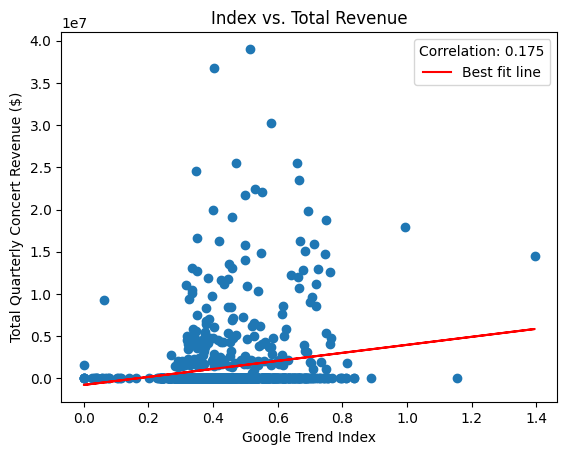

In [48]:
scatter_corr(avg_by_quarter['Trend Index'], gdp_subset['Total Revenue'], "Google Trend Index", "Total Quarterly Concert Revenue ($)", "Index vs. Total Revenue")

With a correlation coefficient of 0.175, we can see that there is some positive correlation between the Google Trend Index for a given quarter and state and the total concert revenue in that state and quarter.

C:\Users\30693\AppData\Local\Temp\ipykernel_23260\1483391314.py:1: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  scatter_corr(avg_by_quarter['Trend Index'][:-1], gdp_subset['Total Revenue'][1:], "Previous Quarter Google Trend Index", "Total Quarterly Concert Revenue ($)", "Previous Quarter Index vs. Total Revenue")


'Correlation Coefficient: 0.1424502276626339'

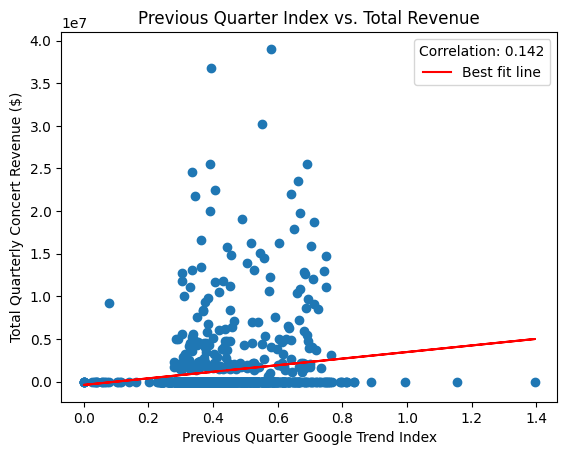

In [49]:
scatter_corr(avg_by_quarter['Trend Index'][:-1], gdp_subset['Total Revenue'][1:], "Previous Quarter Google Trend Index", "Total Quarterly Concert Revenue ($)", "Previous Quarter Index vs. Total Revenue")

As shown by this new scatter plot, the previous quarter's Google Trend Index also seems to have some positive correlation with total revenue for that state and quarter as shown by the positive correlation coefficient. The correlation with the previous index is less than the current quarter's index like we saw with the previous plot.

C:\Users\30693\AppData\Local\Temp\ipykernel_23260\3836505294.py:1: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  scatter_corr(avg_by_quarter['Trend Index'][:-1], gdp_subset['GDP Growth'][1:], "Google Trend Index", "Quarterly GDP Growth (%)", "Google Trend Index vs. GDP Growth")


'Correlation Coefficient: 0.04654216068865492'

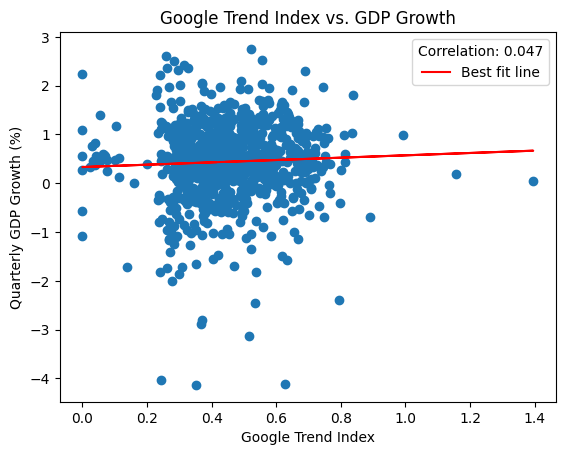

In [51]:
scatter_corr(avg_by_quarter['Trend Index'][:-1], gdp_subset['GDP Growth'][1:], "Google Trend Index", "Quarterly GDP Growth (%)", "Google Trend Index vs. GDP Growth")

Finally, this plot shows the relationship between Google Trend Index and GDP growth. This one has the least correlation with an almost 0 correlation coefficient with it being very slightly positive. Becasue of this, it is unclear whether or not machine learning models will be able to predict GDP growth using Google Trend Index alone with satisfactory results. 

<hr>

In [21]:
concerts = pd.read_csv("Data/concerts_with_quarter.csv", index_col=0)
concerts

,Tour,Artist,Date,City,State,Attendance (Avg.),Revenue (Avg.),Quarter,Count
0,÷ Tour,Ed Sheeran,2017-06-29,Kansas City,Missouri,13382.0,1217313.0,2017:Q2,1.0
1,÷ Tour,Ed Sheeran,2017-06-30,Des Moines,Iowa,13375.0,1078939.0,2017:Q2,1.0
2,÷ Tour,Ed Sheeran,2017-07-01,Saint Paul,Minnesota,14938.0,1375063.0,2017:Q3,1.0
3,÷ Tour,Ed Sheeran,2017-07-09,Buffalo,New York,14305.0,1167095.0,2017:Q3,1.0
4,÷ Tour,Ed Sheeran,2017-07-11,Philadelphia,Pennsylvania,14461.0,1315130.0,2017:Q3,1.0
...,...,...,...,...,...,...,...,...,...
448,24K Magic World Tour,Bruno Mars,2018-11-08,Honolulu,Hawaii,37917.0,4131527.0,2018:Q4,1.0
449,24K Magic World Tour,Bruno Mars,2018-11-10,Honolulu,Hawaii,37917.0,4131527.0,2018:Q4,1.0
450,24K Magic World Tour,Bruno Mars,2018-11-11,Honolulu,Hawaii,37917.0,4131527.0,2018:Q4,1.0
451,24K Magic World Tour,Bruno Mars,2018-12-30,Las Vegas,Nevada,15121.0,2929784.0,2018:Q4,1.0


In [22]:
concerts_subset = concerts[concerts['State'].isin(state_abbr_map.values())]
concerts_subset

,Tour,Artist,Date,City,State,Attendance (Avg.),Revenue (Avg.),Quarter,Count
0,÷ Tour,Ed Sheeran,2017-06-29,Kansas City,Missouri,13382.0,1217313.0,2017:Q2,1.0
1,÷ Tour,Ed Sheeran,2017-06-30,Des Moines,Iowa,13375.0,1078939.0,2017:Q2,1.0
2,÷ Tour,Ed Sheeran,2017-07-01,Saint Paul,Minnesota,14938.0,1375063.0,2017:Q3,1.0
3,÷ Tour,Ed Sheeran,2017-07-09,Buffalo,New York,14305.0,1167095.0,2017:Q3,1.0
4,÷ Tour,Ed Sheeran,2017-07-11,Philadelphia,Pennsylvania,14461.0,1315130.0,2017:Q3,1.0
...,...,...,...,...,...,...,...,...,...
448,24K Magic World Tour,Bruno Mars,2018-11-08,Honolulu,Hawaii,37917.0,4131527.0,2018:Q4,1.0
449,24K Magic World Tour,Bruno Mars,2018-11-10,Honolulu,Hawaii,37917.0,4131527.0,2018:Q4,1.0
450,24K Magic World Tour,Bruno Mars,2018-11-11,Honolulu,Hawaii,37917.0,4131527.0,2018:Q4,1.0
451,24K Magic World Tour,Bruno Mars,2018-12-30,Las Vegas,Nevada,15121.0,2929784.0,2018:Q4,1.0


In [23]:
concerts_with_trends = concerts_subset.merge(quarterly_trends, on=['State', 'Quarter', 'Artist'])

In [24]:
# given a quarter string (i.e. 2015:Q1), get the previous quarter
# 2015:Q1 -> 2014:Q4, 2018:Q3 -> 2018:Q2
def prev_quarter(quarter):

    q = int(quarter[-1:])
    y = int(quarter[:4])
   
    if q == 1:
        prev_q = 4
        prev_y = y - 1
    else:
        prev_q = q - 1
        prev_y = y
    
    return str(prev_y) + ":Q" + str(prev_q) 

In [25]:
# this method adds the previous quarter index to a dataframe row
def add_prev_quarter(row):

    artist = row['Artist']
    current_quarter = row['Quarter']
    state = row['State']

    prev_q = prev_quarter(current_quarter)

    prev_index = quarterly_trends[(quarterly_trends['Artist'] == artist) & 
                         (quarterly_trends['Quarter'] == prev_q) &
                         (quarterly_trends['State'] == state)]['Trend Index']
    
    row['Previous Quarter Index'] = prev_index.values[0]

    return row

In [26]:
# we apply the previous method to our df to have both the current and previous quarter Google Trend Index
concerts_with_trends = concerts_with_trends.apply(add_prev_quarter, axis=1)

In [27]:
concerts_with_trends = concerts_with_trends.dropna()
concerts_with_trends

,Tour,Artist,Date,City,State,Attendance (Avg.),Revenue (Avg.),Quarter,Count,Trend Index,Previous Quarter Index
0,÷ Tour,Ed Sheeran,2017-06-29,Kansas City,Missouri,13382.0,1217313.0,2017:Q2,1.0,1.307565,1.672580
1,÷ Tour,Ed Sheeran,2017-06-30,Des Moines,Iowa,13375.0,1078939.0,2017:Q2,1.0,1.717238,2.127836
2,÷ Tour,Ed Sheeran,2017-07-01,Saint Paul,Minnesota,14938.0,1375063.0,2017:Q3,1.0,1.314404,1.390916
3,÷ Tour,Ed Sheeran,2017-07-09,Buffalo,New York,14305.0,1167095.0,2017:Q3,1.0,1.453539,1.136132
4,÷ Tour,Ed Sheeran,2017-09-29,Brooklyn,New York,13688.0,1219493.0,2017:Q3,1.0,1.453539,1.136132
...,...,...,...,...,...,...,...,...,...,...,...
441,24K Magic World Tour,Bruno Mars,2018-11-08,Honolulu,Hawaii,37917.0,4131527.0,2018:Q4,1.0,7.948718,2.529762
442,24K Magic World Tour,Bruno Mars,2018-11-10,Honolulu,Hawaii,37917.0,4131527.0,2018:Q4,1.0,7.948718,2.529762
443,24K Magic World Tour,Bruno Mars,2018-11-11,Honolulu,Hawaii,37917.0,4131527.0,2018:Q4,1.0,7.948718,2.529762
444,24K Magic World Tour,Bruno Mars,2018-12-30,Las Vegas,Nevada,15121.0,2929784.0,2018:Q4,1.0,1.051289,0.867876


'Correlation Coefficient: -0.1412440257656654'

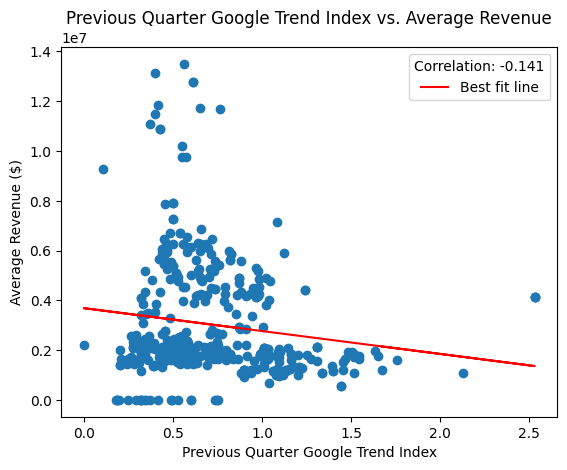

In [52]:
scatter_corr(concerts_with_trends['Previous Quarter Index'], concerts_with_trends['Revenue (Avg.)'], "Previous Quarter Google Trend Index", "Average Revenue ($)", "Previous Quarter Google Trend Index vs. Average Revenue")

Interestingly, we see a negative correlation between previous quarter Google Trend Index and average concert revenue.

In [29]:
X = concerts_with_trends[['Previous Quarter Index', 'Trend Index']]
y = concerts_with_trends['Attendance (Avg.)']

In [30]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lin_reg = LinearRegression()
lin_reg.fit(X, y)

# report the training error of simple linear regression
mean_squared_error(lin_reg.predict(X), y) ** 0.5

16228.511246635717

In [31]:
concerts_with_trends.describe()

,Attendance (Avg.),Revenue (Avg.),Count,Trend Index,Previous Quarter Index
count,429.000000,4.290000e+02,429.0,429.000000,429.000000
mean,24549.524476,3.023124e+06,1.0,0.921921,0.720510
std,16722.699142,2.355656e+06,0.0,0.705475,0.361727
min,0.000000,0.000000e+00,1.0,0.000000,0.000000
25%,13805.000000,1.652912e+06,1.0,0.618340,0.467455
50%,15651.000000,2.105004e+06,1.0,0.809609,0.628606
75%,41086.000000,4.247778e+06,1.0,1.128722,0.940156
max,64442.000000,1.349418e+07,1.0,7.948718,2.529762


RMSE is less than one SD when predicting Attendance

In [32]:
2.3e6

concerts_with_trends['Revenue (Avg.)'].describe()

count    4.290000e+02
mean     3.023124e+06
std      2.355656e+06
min      0.000000e+00
25%      1.652912e+06
50%      2.105004e+06
75%      4.247778e+06
max      1.349418e+07
Name: Revenue (Avg.), dtype: float64

In [33]:
populations = pd.read_csv("Data/state_populations.csv")

In [34]:
test_with_populations = concerts_with_trends.merge(populations)
test_with_populations

,Tour,Artist,Date,City,State,Attendance (Avg.),Revenue (Avg.),Quarter,Count,Trend Index,Previous Quarter Index,2020 Population
0,÷ Tour,Ed Sheeran,2017-06-29,Kansas City,Missouri,13382.0,1217313.0,2017:Q2,1.0,1.307565,1.672580,6154913
1,÷ Tour,Ed Sheeran,2018-09-06,St. Louis,Missouri,41522.0,3726270.0,2018:Q3,1.0,1.038167,0.807424,6154913
2,÷ Tour,Ed Sheeran,2018-10-13,Kansas City,Missouri,51324.0,4008747.0,2018:Q4,1.0,0.763292,1.038167,6154913
3,Not in This Lifetime... Tour,Guns N' Roses,2016-06-29,Kansas City,Missouri,40387.0,3285043.0,2016:Q2,1.0,1.195819,0.483784,6154913
4,Not in This Lifetime... Tour,Guns N' Roses,2017-07-27,St. Louis,Missouri,36382.0,3533972.0,2017:Q3,1.0,0.956224,0.398732,6154913
...,...,...,...,...,...,...,...,...,...,...,...,...
424,WorldWired Tour,Metallica,2018-09-11,Sioux Falls,South Dakota,12018.0,1494540.0,2018:Q3,1.0,1.033791,0.634241,886667
425,WorldWired Tour,Metallica,2018-11-28,Boise,Idaho,11868.0,1454270.0,2018:Q4,1.0,1.042178,0.610535,1839106
426,WorldWired Tour,Metallica,2019-01-22,Birmingham,Alabama,17462.0,1713460.0,2019:Q1,1.0,0.700128,0.460818,5024279
427,Beautiful Trauma World Tour,Pink,2019-03-14,Birmingham,Alabama,13959.0,1487637.0,2019:Q1,1.0,0.684165,0.308303,5024279


In [35]:
X = test_with_populations[['Previous Quarter Index', 'Trend Index', '2020 Population']]
y = test_with_populations['Revenue (Avg.)']

lin_reg = LinearRegression()
lin_reg.fit(X, y)

# report training error
mean_squared_error(lin_reg.predict(X), y) ** 0.5

2252355.2789614154

'Correlation Coefficient: 0.07720823571250689'

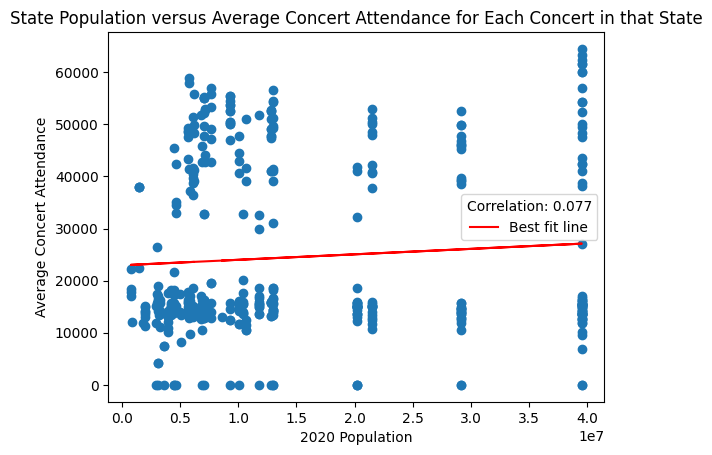

In [53]:
scatter_corr(test_with_populations['2020 Population'], test_with_populations['Attendance (Avg.)'], "2020 Population", "Average Concert Attendance", "State Population versus Average Concert Attendance for Each Concert in that State")

We see a very slight positive correlation, but similar to the correlation between Google Trend Index and GDP growth, this correlation is very close to zero. This indicates that it is probably unlikely that machine learning models would be able to exploit state population alone in order to predict concert attendance. However, we can definitely use state population as part of our input data with predicting concert attendance. One reason to do this is to capture the variable that exists where high-population states may in general have higher attendance concerts.

Next, see if we can predict concert attendance using our data

In [37]:
from sklearn.model_selection import train_test_split

X = test_with_populations[['Previous Quarter Index', 'Trend Index', '2020 Population']]
y = test_with_populations['Attendance (Avg.)']

# initial split to separate out the train set
X_train, X_val_test, y_train, y_val_test = train_test_split(X, y, train_size=0.8, random_state=SEED)

# split the val_test data into validation and test sets so that the final split is 80/10/10
X_val, X_test, y_val, y_test = train_test_split(X_val_test, y_val_test, test_size=0.5, random_state=SEED)

In [91]:
def tune_hyper_params(X_train, y_train, X_val, y_val, models, hyper_param_values, title='Title', x_label='X', extra_hyper_params=None):
    train_errors = []
    val_errors = []

    for i, model in enumerate(models):
        if extra_hyper_params:
            model.fit(X_train, y_train, **extra_hyper_params[i])
        else:
            model.fit(X_train, y_train)
        
        # evaluate on the training set
        train_pred = model.predict(X_train)
        train_rmse = mean_squared_error(y_train, train_pred, squared=False)
        train_errors.append(train_rmse)
        
        # evaluate on the validation set
        val_pred = model.predict(X_val)
        val_rmse = mean_squared_error(y_val, val_pred, squared=False)
        val_errors.append(val_rmse)

    # Plotting the results
    plt.figure()
    plt.plot(hyper_param_values, train_errors, 'o-', color="r", label="Training RMSE")
    plt.plot(hyper_param_values, val_errors, 'o-', color="g", label="Validation RMSE")
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel("RMSE")
    plt.legend()
    plt.show()

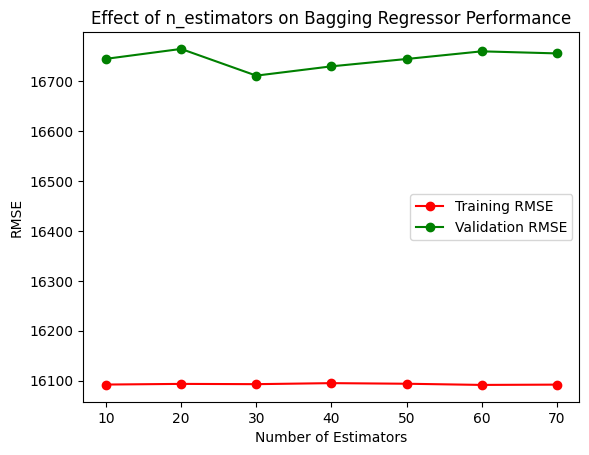

In [79]:
from sklearn.ensemble import BaggingRegressor

# find which n_estimators to use through validation data

n_estimators_range = list(range(10, 71, 10))
models = [BaggingRegressor(LinearRegression(), n_estimators=n, random_state=SEED) for n in n_estimators_range]

title = 'Effect of n_estimators on Bagging Regressor Performance'
x_label = 'Number of Estimators'
tune_hyper_params(X_train, y_train, X_val, y_val, models, n_estimators_range, title, x_label)


As we can see by the plot, the number of estimators doesn't seem to impact the performance of the model, but 30 seems to provide the lowest validation error by a small margin. As a result, we will just use 30 estimators. 

In [80]:
bagged_lin_reg = BaggingRegressor(LinearRegression(), n_estimators=30, random_state=SEED)
bagged_lin_reg.fit(X_train, y_train)

# output training error
mean_squared_error(bagged_lin_reg.predict(X_train), y_train) ** 0.5

16092.987827608513

In [81]:
from sklearn.model_selection import learning_curve

def plot_learning_curve(X, y, model):
    train_sizes, train_scores, val_scores = learning_curve(
        estimator=model, 
        X=X, 
        y=y, 
        train_sizes=np.linspace(0.1, 1.0, 10), 
        cv=5, 
        scoring='neg_mean_squared_error',
        n_jobs=-1
    )

    # calculate the mean and standard deviation for training and validation scores
    train_scores_mean = -np.mean(train_scores, axis=1)
    val_scores_mean = -np.mean(val_scores, axis=1)

    # convert scores to RMSE
    train_rmse = np.sqrt(train_scores_mean)
    val_rmse = np.sqrt(val_scores_mean)

    # plot
    plt.figure()
    plt.title("Learning Curve")
    plt.xlabel("Training examples")
    plt.ylabel("RMSE")
    plt.plot(train_sizes, train_rmse, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, val_rmse, 'o-', color="g", label="Cross-validation score")
    plt.legend(loc="best")
    plt.show()

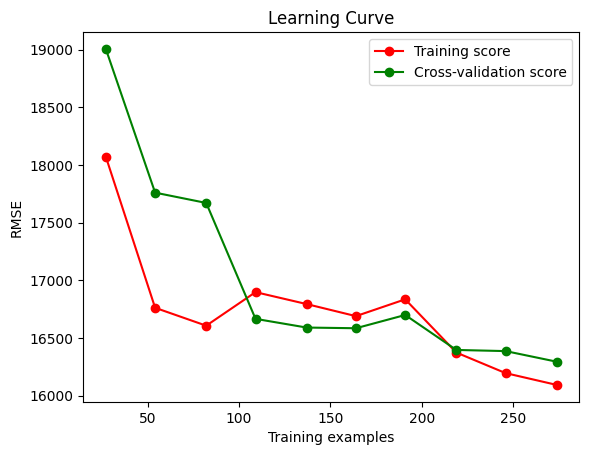

In [82]:
plot_learning_curve(X_train, y_train, bagged_lin_reg)

In general, the learning curve plot looks very promising. As the training samples increase, the training and validation errors converge at a low value which indicates that the model is generalizing well and not overfitting.

Finally, output the testing root mean squared error with the bagged regressor for predicting attendance.

In [104]:
y_pred = bagged_lin_reg.predict(X_test)
mean_squared_error(y_pred, y_test, squared=False)

15695.654417297641

In [100]:
from keras.models import Sequential
from keras.layers import Dense

# create the feed-forward neural network model
model = Sequential()
model.add(Dense(64, input_dim=3, activation='relu'))  # input layer and first hidden layer
model.add(Dense(128, activation='relu'))  # second hidden layer
model.add(Dense(32, activation='relu'))  # third hidden layer
model.add(Dense(1))  # output layer

# compile the model
model.compile(optimizer='adam', loss='mean_squared_error')


2/2 [==============================] - 0s 3ms/step


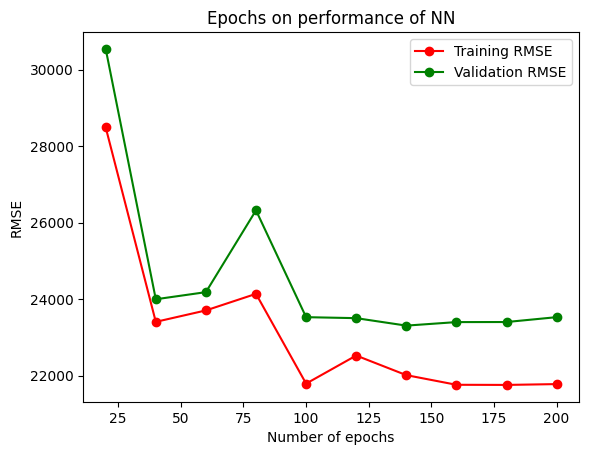

In [101]:
epochs = list(range(20, 201, 20))
models = [model] * len(epochs)
hyperparams = [{'epochs': epoch, 'batch_size': 10, 'verbose': 0} for epoch in epochs]
tune_hyper_params(X_train, y_train, X_val, y_val, models, epochs, title='Epochs on performance of NN', x_label='Number of epochs', extra_hyper_params=hyperparams)


So, to prevent possible overfitting, we will only use 100 epochs since that seems to be the point when the validation accuracy levels off. For this testing, we used a baseline batch-size of 10, but we will also tune this now that we know the number of epochs that we will use.

2/2 [==============================] - 0s 3ms/step


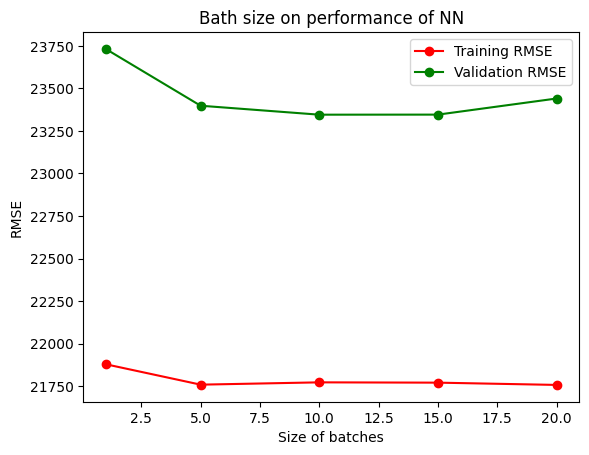

In [102]:
batch_sizes = [1] + list(range(5, 21, 5))
models = [model] * len(batch_sizes)
hyperparams = [{'epochs': 100, 'batch_size': size, 'verbose': 0} for size in batch_sizes]
tune_hyper_params(X_train, y_train, X_val, y_val, models, batch_sizes, title='Batch size on performance of NN', x_label='Size of batches', extra_hyper_params=hyperparams)


As shown, 10 for the batch size seemed to perform the best while a batch size of 1 performed the worst.

In [103]:
# train the model
model.fit(X_train, y_train, epochs=100, batch_size=10, verbose=0)

# run predictions and record testing error
y_pred = model.predict(X_test)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f"Root Mean Squared Error: {rmse}")

2/2 [==============================] - 0s 7ms/step
Root Mean Squared Error: 22301.871633304716


So, the feed forward neural network performed worse at predicting concert attendance using the time-series google trend data and state populations. In addition to this, the bagging regressor actually predicted the attendance with RMSE within one standard deviation.

Next, we will try to predict state GDP growth using the google trend scores

In [129]:
X = avg_by_quarter[['Trend Index']]
y = gdp_subset['GDP Growth']

# initial split to separate out the train set
X_train, X_val_test, y_train, y_val_test = train_test_split(X, y, train_size=0.8, random_state=SEED)

# split the val_test data into validation and test sets so that the final split is 80/10/10
X_val, X_test, y_val, y_test = train_test_split(X_val_test, y_val_test, test_size=0.5, random_state=SEED)

In [111]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

mean_squared_error(lin_reg.predict(X_test), y_test) ** 0.5

0.8209334722746131

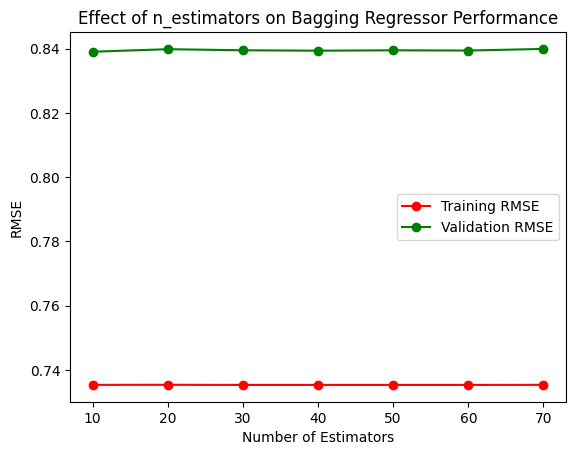

In [107]:
# find which n_estimators to use through validation data

n_estimators_range = list(range(10, 71, 10))
models = [BaggingRegressor(LinearRegression(), n_estimators=n, random_state=SEED) for n in n_estimators_range]

title = 'Effect of n_estimators on Bagging Regressor Performance'
x_label = 'Number of Estimators'
tune_hyper_params(X_train, y_train, X_val, y_val, models, n_estimators_range, title, x_label)

As shown, the number of estimators does not seem to have an effect on the accuracy of the bagging regressor model when predicting GDP growth. So, to keep it less computationally intense, 10 estimators will be used.

In [114]:
bagged_lin_reg_gdp = BaggingRegressor(LinearRegression(), n_estimators=10)
bagged_lin_reg_gdp.fit(X_train, y_train)

# print training error
mean_squared_error(bagged_lin_reg_gdp.predict(X_train), y_train, squared=False)

0.7353575413337585

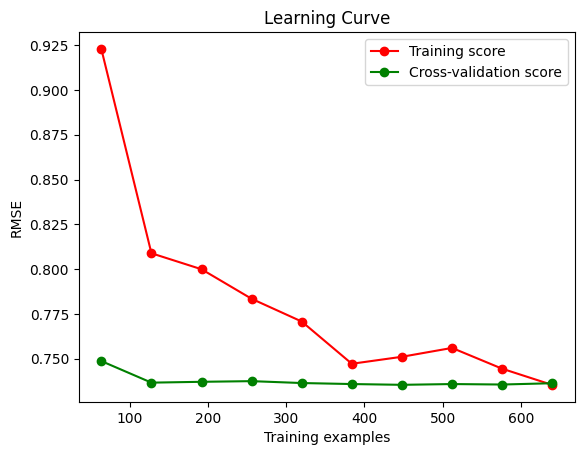

In [115]:
plot_learning_curve(X_train, y_train, bagged_lin_reg_gdp)

The learning curve plot is very interesting, showing that the validation loss is consistently lower than the training loss. The validation loss isn't effected by the number of samples and stays low. This may just be an indication that the training data had much more noise overall than the cross-validation sets generated. 

In [112]:
# Finally, output testing RMSE
mean_squared_error(bagged_lin_reg_gdp.predict(X_test), y_test, squared=False)

0.8202794386629324

In [113]:
# create the feed-forward neural network model
model = Sequential()
model.add(Dense(64, input_dim=1, activation='relu'))  # input layer and first hidden layer
model.add(Dense(128, activation='relu'))  # second hidden layer
model.add(Dense(32, activation='relu'))  # third hidden layer
model.add(Dense(1))  # output layer

# compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

4/4 [==============================] - 0s 2ms/step
Root Mean Squared Error: 0.8240855900941384


4/4 [==============================] - 0s 2ms/step


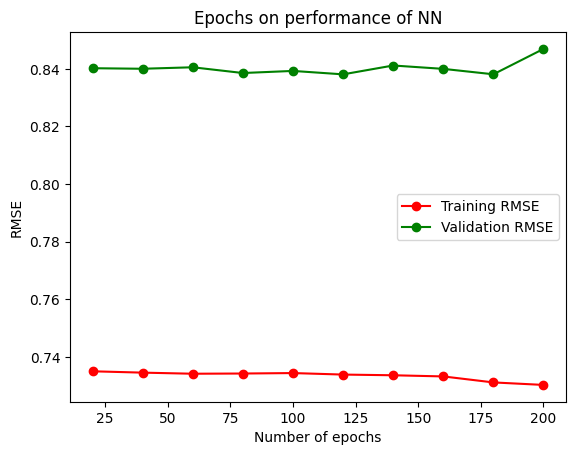

In [116]:
epochs = list(range(20, 101, 20))
models = [model] * len(epochs)
hyperparams = [{'epochs': epoch, 'batch_size': 10, 'verbose': 0} for epoch in epochs]
tune_hyper_params(X_train, y_train, X_val, y_val, models, epochs, title='Epochs on performance of NN', x_label='Number of epochs', extra_hyper_params=hyperparams)

As shown by the plot, more epochs will not affect the validation loss, so only 20 will be used.

4/4 [==============================] - 0s 3ms/step


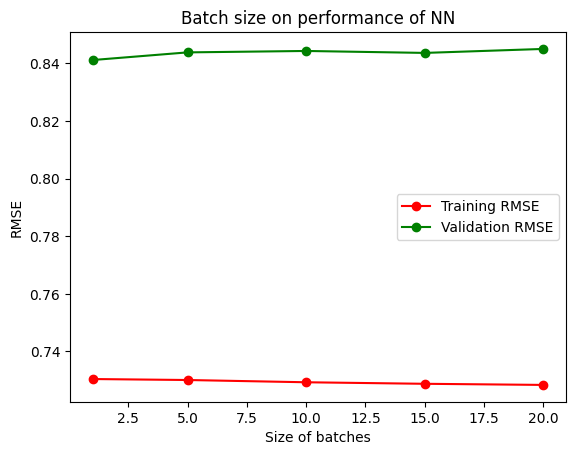

In [118]:
batch_sizes = [1] + list(range(5, 21, 5))
models = [model] * len(batch_sizes)
hyperparams = [{'epochs': 20, 'batch_size': size, 'verbose': 0} for size in batch_sizes]
tune_hyper_params(X_train, y_train, X_val, y_val, models, batch_sizes, title='Batch size on performance of NN', x_label='Size of batches', extra_hyper_params=hyperparams)

As shown by the plot, the size of the batches doesn't seem to matter in terms of the validation loss, so 10 will be used as a nice base-line.

In [121]:
# train the model using learned hyper parameters
model.fit(X_train, y_train, epochs=20, batch_size=10, verbose=0)

# run predictions

y_pred = model.predict(X_train)
rmse = mean_squared_error(y_train, y_pred, squared=False)
print(f"Root Mean Squared Training Error: {rmse}")

y_pred = model.predict(X_test)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f"Root Mean Squared Testing Error: {rmse}")

25/25 [==============================] - 0s 2ms/step
Root Mean Squared Training Error: 0.7271228791943971
4/4 [==============================] - 0s 2ms/step
Root Mean Squared Testing Error: 0.8157803319944666


In [120]:
gdp_subset.describe()

,GDP Growth,Count,Total Revenue
count,1000.000000,1000.00000,1.000000e+03
mean,0.436205,0.44600,1.296920e+06
std,0.754950,1.23475,3.962147e+06
min,-4.133798,0.00000,0.000000e+00
25%,0.106842,0.00000,0.000000e+00
50%,0.489704,0.00000,0.000000e+00
75%,0.870058,0.00000,0.000000e+00
max,2.752765,15.00000,3.902714e+07


As shown by the results, the feed forward neural network's testing loss was slightly better than the bagging regressor's testing loss. While the training RMSE for both the bagging regressor and neural network were less than a standard deviation, the testing losses for both were greater than a standard deviation. This matches the validation-scoring plots we made for both models where the validation losses were generally much higher than the training losses. While this generally indicates underfitting in which the models used are not powerful enough to represent the data, the use of a fairly sophisticated neural network shows that the problem might be with the data itself. In other words, the connection between the trend data alone and GDP growth isn't a strong one.

Since the training losses for the models were significantly lower than the testing losses, overfitting could be a possibility. To see if this possible overfitting could be combatted, we compile the neural network with the same hyperparameters, this time using the dropout technique to remove 50% of the neurons in each hidden layer for any given epoch during training. The dropout technique is designed to combat overfitting, so if overfitting is actually happening then we should see a boost in performance.

In [127]:
from keras.layers import Dropout

model_with_dropout = Sequential()
model_with_dropout.add(Dense(64, input_dim=1, activation='relu'))  # input layer and first hidden layer
model_with_dropout.add(Dropout(0.5))  # dropout layer after first hidden layer
model_with_dropout.add(Dense(128, activation='relu'))  # second hidden layer
model_with_dropout.add(Dropout(0.5))  # dropout layer after second hidden layer
model_with_dropout.add(Dense(32, activation='relu'))  # third hidden layer
model_with_dropout.add(Dropout(0.5))  # dropout layer after third hidden layer
model_with_dropout.add(Dense(1))  # output layer

# compile the model
model_with_dropout.compile(optimizer='adam', loss='mean_squared_error')

In [134]:
# train the model with dropout using learned hyper parameters
model_with_dropout.fit(X_train, y_train, epochs=20, batch_size=10, verbose=0)

# run predictions

y_pred = model_with_dropout.predict(X_train)
rmse = mean_squared_error(y_train, y_pred, squared=False)
print(f"Root Mean Squared Training Error: {rmse}")

y_pred = model_with_dropout.predict(X_test)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f"Root Mean Squared Testing Error: {rmse}")

25/25 [==============================] - 0s 958us/step
Root Mean Squared Training Error: 0.780457692843076
4/4 [==============================] - 0s 1ms/step
Root Mean Squared Testing Error: 0.8334981524010098


As shown, adding dropout to the neural network didn't seem to improve performance. Instead of overfitting, the issue at hand is more likely the fact that the data set granularity is fairly low and also the data set size in general is quite low, especially for the concert data which will be used more later. As we saw with the Google Trend Index preliminary analysis in the beginning, there was almost zero correlation between Google Trend Index and quarterly GDP growth which also helps explain why the models weren't predicting GDP growth within a satisfactory loss using just Google Trend Index as input. 

Finally, we will just try to predict GDP growth from concert attendance, seeing if we can predict it without taking into account the social media aspect of our objective through the trends data

In [122]:
trend_population_gdp = pd.merge(test_with_populations, gdp_subset, on=['State', 'Quarter'])

X = trend_population_gdp[['Attendance (Avg.)']]
y = trend_population_gdp['GDP Growth']

# initial split to separate out the train set
X_train, X_val_test, y_train, y_val_test = train_test_split(X, y, train_size=0.8, random_state=SEED)

# split the val_test data into validation and test sets so that the final split is 80/10/10
X_val, X_test, y_val, y_test = train_test_split(X_val_test, y_val_test, test_size=0.5, random_state=SEED)

In [123]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

mean_squared_error(lin_reg.predict(X_test), y_test) ** 0.5

0.5774555604992673

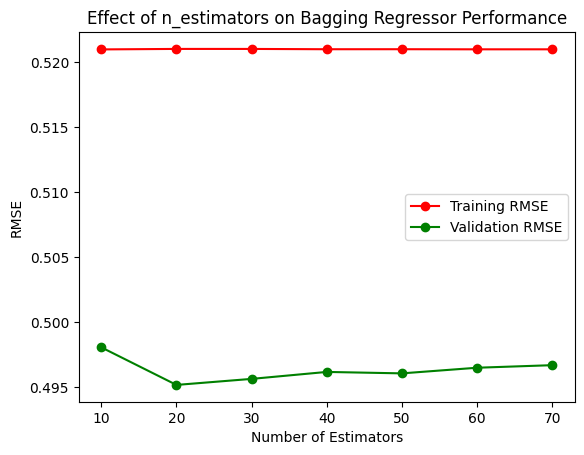

In [124]:
# find which n_estimators to use through validation data

n_estimators_range = list(range(10, 71, 10))
models = [BaggingRegressor(LinearRegression(), n_estimators=n, random_state=SEED) for n in n_estimators_range]

title = 'Effect of n_estimators on Bagging Regressor Performance'
x_label = 'Number of Estimators'
tune_hyper_params(X_train, y_train, X_val, y_val, models, n_estimators_range, title, x_label)

As shown, the number of estimators does not seem to have an effect on the accuracy of the bagging regressor model when predicting GDP growth. So, to keep it less computationally intense, 10 estimators will be used.

In [125]:
bagged_lin_reg_gdp_atten = BaggingRegressor(LinearRegression(), n_estimators=10)
bagged_lin_reg_gdp_atten.fit(X_train, y_train)

# output training error
mean_squared_error(bagged_lin_reg_gdp_atten.predict(X_train), y_train, squared=False)

0.5212466087619914

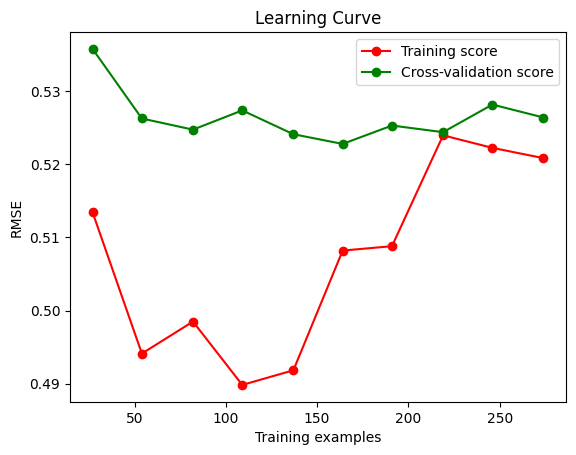

In [126]:
plot_learning_curve(X_train, y_train, bagged_lin_reg_gdp_atten)

The results of this learning curve are also surprising, where the training loss seems to increase as the number of training samples increases after the 100 mark. This could be for many reasons, one of them being some outliers in the training data that happen to appear after the 100 mark which significantly harms the accuracy of the model.

In [128]:
# Finally, output testing RMSE
mean_squared_error(bagged_lin_reg_gdp_atten.predict(X_test), y_test, squared=False)

0.5800211818743195

In [130]:
# create the feed-forward neural network model
model = Sequential()
model.add(Dense(64, input_dim=1, activation='relu'))  # input layer and first hidden layer
model.add(Dense(128, activation='relu'))  # second hidden layer
model.add(Dense(32, activation='relu'))  # third hidden layer
model.add(Dense(1))  # output layer

# compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

2/2 [==============================] - 0s 8ms/step


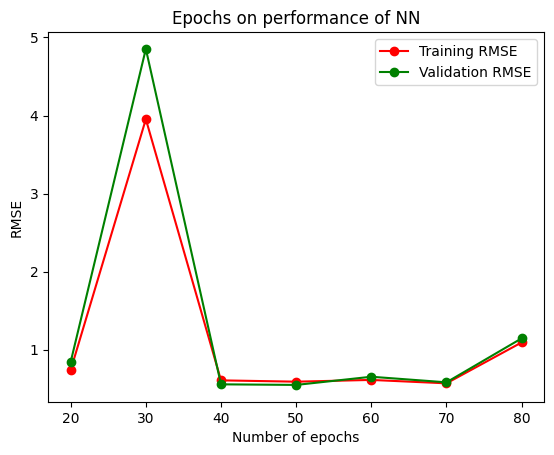

In [132]:
epochs = list(range(20, 81, 10))
models = [model] * len(epochs)
hyperparams = [{'epochs': epoch, 'batch_size': 10, 'verbose': 0} for epoch in epochs]
tune_hyper_params(X_train, y_train, X_val, y_val, models, epochs, title='Epochs on performance of NN', x_label='Number of epochs', extra_hyper_params=hyperparams)

As shown in the graph, there seems to be a weird peak in loss with 30 epochs which seems to go away and level out at about 40 epochs. As a result, 40 epochs will be used for the neural network.

2/2 [==============================] - 0s 4ms/step


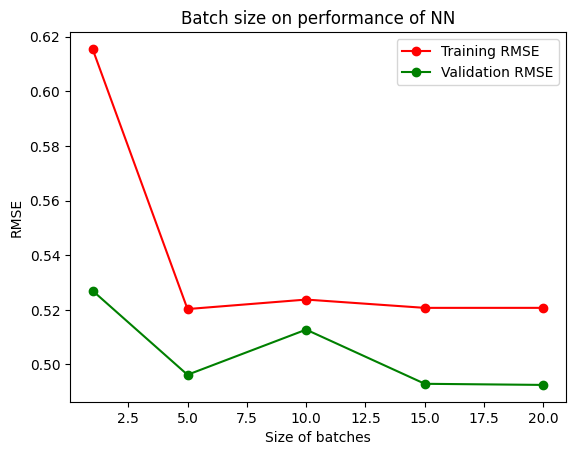

In [133]:
batch_sizes = [1] + list(range(5, 21, 5))
models = [model] * len(batch_sizes)
hyperparams = [{'epochs': 40, 'batch_size': size, 'verbose': 0} for size in batch_sizes]
tune_hyper_params(X_train, y_train, X_val, y_val, models, batch_sizes, title='Batch size on performance of NN', x_label='Size of batches', extra_hyper_params=hyperparams)

As shown in the plot, a batch size of 15 seemed to be where the loss started to flatten out and plateau. As a result, 15 will be used.

In [134]:
# train the model
model.fit(X_train, y_train, epochs=40, batch_size=15, verbose=0)

# run predictions

y_pred = model.predict(X_train)
rmse = mean_squared_error(y_train, y_pred, squared=True)
print(f"Root Mean Squared Training Error: {rmse}")


y_pred = model.predict(X_test)
rmse = mean_squared_error(y_test, y_pred, squared=True)
print(f"Root Mean Squared Testing Error: {rmse}")

11/11 [==============================] - 0s 1ms/step
Root Mean Squared Training Error: 0.2711317198892375
2/2 [==============================] - 0s 5ms/step
Root Mean Squared Testing Error: 0.33851710167759397


We can see with the results that the neural network heavily outperformed the bagging regressor in this use-case with a testing error of ~0.34 while the bagging regressor's testing error was ~0.58. Looking back on the statistical description of the GDP growth data, we can see that both these loss figures are well below a standard deviation, with the neural network's testing loss being less than half a standard deviation. Between all the use-cases for these types of models and our collected data, this is the best model accuracy obtained. This, to a degree, matches our preliminary research that suggested a connection between concerts and GDP growth.